Basic numerical integration: the trapezoid rule
===============================================

**Illustrates**: basic array slicing, functions as first class objects.

In this exercise, you are tasked with implementing the simple trapezoid rule
formula for numerical integration. If we want to compute the definite integral

$$
     \int_{a}^{b}f(x)dx
$$

we can partition the integration interval $[a,b]$ into smaller subintervals,
and approximate the area under the curve for each subinterval by the area of
the trapezoid created by linearly interpolating between the two function values
at each end of the subinterval:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Trapezoidal_rule_illustration.png/316px-Trapezoidal_rule_illustration.png" /img>

The blue line represents the function $f(x)$ and the red line
is the linear interpolation.  By subdividing the interval $[a,b]$, the area under $f(x)$ can thus be approximated as the sum of the areas of all
the resulting trapezoids. 

If we denote by $x_{i}$ ($i=0,\ldots,n,$ with $x_{0}=a$ and
$x_{n}=b$) the abscissas where the function is sampled, then

$$
   \int_{a}^{b}f(x)dx\approx\frac{1}{2}\sum_{i=1}^{n}\left(x_{i}-x_{i-1}\right)\left(f(x_{i})+f(x_{i-1})\right).
$$

The common case of using equally spaced abscissas with spacing $h=(b-a)/n$ reads simply

$$
   \int_{a}^{b}f(x)dx\approx\frac{h}{2}\sum_{i=1}^{n}\left(f(x_{i})+f(x_{i-1})\right).
$$

One frequently receives the function values already precomputed, $y_{i}=f(x_{i}),$
so the equation above becomes

$$
   \int_{a}^{b}f(x)dx\approx\frac{1}{2}\sum_{i=1}^{n}\left(x_{i}-x_{i-1}\right)\left(y_{i}+y_{i-1}\right).
$$

## Exercises

### 1

Write a function `trapz(x, y)`, that applies the trapezoid formula to pre-computed values, 
where `x` and `y` are 1-d arrays.

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
def trapz(x, y):
    return 0.5*np.sum((x[1:]-x[:-1])*(y[1:]+y[:-1]))

### 2 

Write a function  `trapzf(f, a, b, npts=100)` that accepts a function `f`, the endpoints `a`
and `b` and the number of samples to take `npts`.  Sample the function uniformly at these
points and return the value of the integral.

In [20]:
def trapzf(f, a, b, npts=100):
    x = np.linspace(a, b, npts)
    y = f(x)
    return trapz(x, y)

### 3

Verify that both functions above are correct by showing that they produces correct values 
for a simple integral such as $\int_0^3 x^2$.

In [21]:
exact = 9.0
x = np.linspace(0, 3, 50)
y = x**2

print exact
print trapz(x, y)

def f(x): return x**2
print trapzf(f, 0, 3, 50)

9.0
9.00187421908
9.00187421908


### 4

Repeat the integration for several values of `npts`, and plot the error as a function of `npts` 
for the integral in #3.

In [22]:
npts = [5, 10, 20, 50, 100, 200]
err = []
for n in npts:
    err.append(trapzf(f, 0, 3, n)-exact)

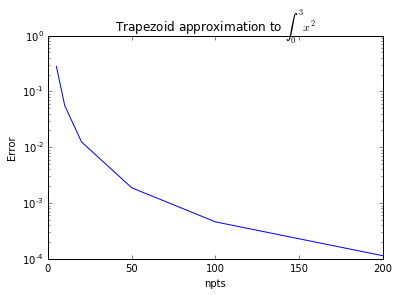

In [23]:
plt.semilogy(npts, np.abs(err))
plt.title(r'Trapezoid approximation to $\int_0^3 x^2$')
plt.xlabel('npts')
plt.ylabel('Error')

## An illustration using matplotlib and scipy

We define a function with a little more complex look

In [24]:
def f(x):
    return (x-3)*(x-5)*(x-7)+85

x = linspace(0, 10, 200)
y = f(x)

Choose a region to integrate over and take only a few points in that region

In [25]:
a, b = 1, 9
xint = x[logical_and(x>=a, x<=b)][::30]
yint = y[logical_and(x>=a, x<=b)][::30]

Plot both the function and the area below it in the trapezoid approximation

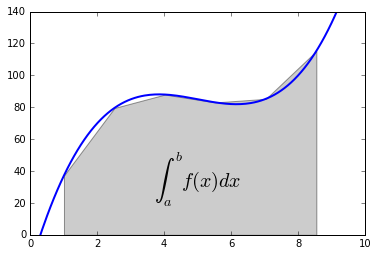

In [26]:
plot(x, y, lw=2)
axis([0, 10, 0, 140])
fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)
text(0.5 * (a + b), 30,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20);

In practice, we don't need to implement numerical integration ourselves, as scipy has both basic trapezoid
rule integrators and more sophisticated ones. Here we illustrate both:

In [27]:
from scipy.integrate import quad, trapz
integral, error = quad(f, 1, 9)
print "The integral is:", integral, "+/-", error
print "The trapezoid approximation with", len(xint), "points is:", trapz(yint, xint)

The integral is: 680.0 +/- 7.54951656745e-12
The trapezoid approximation with 6 points is: 621.286411141
